#                 **TANZANIAN WATER WELLS PREDICTION**

## **Business understanding Problem and Objective**

#### Stakeholder:Tanzanian NGO

### **Overview**

#### Tanzania faces significant challenges in providing consistent access to clean water for its citizens. With an estimated population of 70.5 million in mid‑2025, Tanzania remains one of Africa’s fastest-growing nations in terms of population and resource demand.

### **Business problem**
##### The client seeks insights into patterns distinguishing **functional** versus **non-functional or repair-needed wells**, to inform drilling strategies and maintenance priorities. The goal is to help villages avoid prolonged downtime and reduce socio-economic burdens especially on women and children, who are often tasked with collecting water.

### **Project objective**
##### Use the Pump It Up dataset (featuring features like pump type, installation year, payment method, and location) to build a **classification model** that:
         1.Predict well status in a **binary setup**: functional vs. needs attention (repair or     non-functional).  
         2.Identify the key features driving pump failures (e.g., pump type, installation year, management system).

### **Project goal/value**
##### Enables targeted maintenance, directing resources to at-risk wells before they fail.#### Reduces the socioeconomic burden of water insecurity by ensuring greaterhealth, education, and gender equity outcomes.

### **Data source**
##### DrivenData. (2015). Pump it Up: Data Mining the Water Table. Retrieved [Month Day Year] from https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table.




###  **Data Understanding and overview**
#### import libraries which will support data exploration, preprocessing, modeling, and evaluation:


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, KFold

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning

from scipy.stats import randint
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve




#### Load dataset
##### Loads data and displays firsh five rows to giv general overview.

In [2]:
# train dataset
df_labels=pd.read_csv("Dataset/Training set labels.csv")
df_values=pd.read_csv("Dataset/Training set values.csv")

print("Labels:")
display(df_labels.head())

print("\nValues:")
display(df_values.head())

Labels:


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional



Values:


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
#merge the two datasets using id and gets shape (rows and columns)
train_df = df_values.merge(df_labels, on='id')
display(train_df.head())
print("Combined shape:", train_df.shape)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Combined shape: (59400, 41)


In [4]:
#load test set
test_df = pd.read_csv('Dataset/Test set values.csv')



In [5]:
#combining train and test data for cleaning and preprocessing
#Add a flag so you can split them later
train_df['source'] = 'train'
test_df['source'] = 'test'
test_df['status_group'] = np.nan  # placeholder for label column

# Combine
df= pd.concat([train_df, test_df], axis=0)


In [6]:
#checking columns in our data
df.columns


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [7]:
#info-get data type of columns and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

#### summery of the column data types

In [8]:
def data_types(data):

    print("Our dataset has", len( data.select_dtypes(include='number').columns),
                "numeric columns")
    
    print("and", len(data.select_dtypes(include='object').columns),
          "categorical columns")
data_types(df) 

Our dataset has 10 numeric columns
and 31 categorical columns


### **Data cleaning and Preprocessing**


#### a) Duplicates
##### checks values which have been duplicated (repeated) in our dataset

In [9]:
#checking duplicates using a function
duplicates = []

def check_duplicates(data):

    """Function that iterates through the rows of our dataset to check whether they are duplicated or not"""
    
    for i in data.duplicated():
        duplicates.append(i)
    duplicates_values = set(duplicates)
    if(len(duplicates_values) == 1):
        print('Our Dataset has no Duplicates')

    else:
        duplicates_percentage = np.round(((sum(duplicates)/len(data)) * 100 ), 2)
        print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')
        

check_duplicates(df)

Our Dataset has no Duplicates


#### b) Missing values
#### Checks columns with ommited or no values

In [10]:
#checking missing values
# Get total and percentage of missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

print("Missing values in dataset:")
display(missing_df)



Missing values in dataset:


,Missing Values,Percentage
scheme_name,35258,47.485522
status_group,14850,20.000000
scheme_management,4846,6.526599
installer,4532,6.103704
funder,4504,6.065993
public_meeting,4155,5.595960
permit,3793,5.108418
subvillage,470,0.632997


### Explanation on columns with missing values

### Scheme_name and Scheme Management
#### The main objective of this project is to analyze data in order to predict whether water wells in Tanzania are functional or non-functional. The features scheme_name and scheme_management provide information about the names of water supply schemes and their managing entities.However, these features are not expected to be strong predictors of well functionality.
#### In addition, both columns have approximately 47% missing values, which is nearly half of the dataset. Imputing these missing values would not only be difficult but also unlikely to add significant predictive power to the model.
#### Therefore we will drop them.

In [11]:
#dropping scheme name & scheme management.
df.drop(['scheme_name','scheme_management'], axis=1,inplace=True)

In [12]:
#preview shape after dropping
df.shape

(74250, 39)

### Funder
#### The funder feature contains the names of organizations or individuals who contributed to the installation of the wells, which could offer valuable insights for future partnerships and resource allocation.
#### However, this column has approximately 6% missing values. Since the proportion is relatively small and the information could be meaningful, we will drop only the rows with missing values in this column and select only top 20 funders.

In [13]:
#1. Check value counts for funder
funder_counts = df['funder'].value_counts()
funder_counts


Government Of Tanzania           11299
Danida                            3907
Hesawa                            2782
Rwssp                             1703
World Bank                        1701
                                 ...  
Kagunguli Secondary                  1
Mzee Lesilali                        1
Grazie Franco Lucchini               1
If                                   1
Hesawa And Concern World Wide        1
Name: funder, Length: 2140, dtype: int64

In [14]:
#Keep only the top 20 funders
top_n = 20
top_funders = funder_counts.nlargest(top_n).index

df['funder_reduced'] = df['funder'].where(df['funder'].isin(top_funders), 'Other')
df = df.drop(columns=['funder'])



In [15]:
df.shape

(74250, 39)

### Installer
##### This refers to contractors who are installing the wells.This would contribute much to our stakeholder on the best contractors to work with.
##### The  percentage of the missing values are not much ,we will therefore drop the rows with the missing values only.


##### The installer column also contains names of organizations or entities responsible for installing water wells. However, this column includes many inconsistencies due to:

- **Spelling errors** (e.g., `Distric Water Department` vs. `District Water Department`)
- **Variations in formatting** (e.g., `GOVERNMENT`, `Government`, `Governmen`)
- **Synonyms or partial names** representing the same entity

##### To clean this, we used a **dictionary mapping** approach. This method replaces all known variations and misspellings with a consistent, unified label.

In [16]:
# Dictionary of common replacements for installer names
installer_mapping = {
    # District Council
    'District Water Department': 'District water department',
    'District water depar': 'District water department',
    'Distric Water Department': 'District water department',
    
    # Fini Water
    'FinW': 'Fini Water',
    'Fini water': 'Fini Water',
    'FINI WATER': 'Fini Water',
    
    # Jaica
    'JAICA': 'Jaica',
    
    # District Council Variants
    'COUN': 'District council',
    'District COUNCIL': 'District council',
    'DISTRICT COUNCIL': 'District council',
    'District Counci': 'District council',
    'District Council': 'District council',
    'Council': 'District council',
    'Counc': 'District council',
    'District  Council': 'District council',
    'Distri': 'District council',
    
    # RC Church Variants
    'RC CHURCH': 'RC Church',
    'RC Churc': 'RC Church',
    'RC': 'RC Church',
    'RC Ch': 'RC Church',
    'RC C': 'RC Church',
    'RC CH': 'RC Church',
    'RC church': 'RC Church',
    'RC CATHORIC': 'RC Church',
    
    # Central Government Variants
    'Central Government': 'Central government',
    'Tanzania Government': 'Central government',
    'central government': 'Central government',
    'Cental Government': 'Central government',
    'Cebtral Government': 'Central government',
    'Tanzanian Government': 'Central government',
    'Tanzania government': 'Central government',
    'Centra Government': 'Central government',
    'CENTRAL GOVERNMENT': 'Central government',
    'TANZANIAN GOVERNMENT': 'Central government',
    'Central govt': 'Central government',
    'Centr': 'Central government',
    'Centra govt': 'Central government',
    
    # World Vision
    'World vision': 'World Vision',
    'World Division': 'World Vision',
    
    # Unicef
    'Unisef': 'Unicef',
    'UNICEF': 'Unicef',
    
    # DANIDA
    'DANID': 'DANIDA',
    
    # Villagers
    'villigers': 'villagers',
    'villager': 'villagers',
    'Villagers': 'villagers',
    'Villa': 'villagers',
    'Village': 'villagers',
    'Villi': 'villagers',
    'Village Council': 'villagers',
    'Village Counil': 'villagers',
    'Villages': 'villagers',
    'Vill': 'villagers',
    'Village community': 'villagers',
    'Villaers': 'villagers',
    'Village Community': 'villagers',
    'Villag': 'villagers',
    'Villege Council': 'villagers',
    'Village council': 'villagers',
    'Village  Council': 'villagers',
    'Villagerd': 'villagers',
    'Villager': 'villagers',
    'Village Technician': 'villagers',
    'Village Office': 'villagers',
    'Village community members': 'villagers',
    
    # Community
    'Commu': 'Community',
    'Communit': 'Community',
    'commu': 'Community',
    'COMMU': 'Community',
    'COMMUNITY': 'Community',
    
    # Government Variants
    'GOVERNMENT': 'Government',
    'GOVER': 'Government',
    'GOVERNME': 'Government',
    'GOVERM': 'Government',
    'GOVERN': 'Government',
    'Gover': 'Government',
    'Gove': 'Government',
    'Governme': 'Government',
    'Governmen': 'Government',
    
    # Other custom fixes
    'Hesawa': 'HESAWA',
    'Colonial Government': 'Colonial government',
    'Government of Misri': 'Misri Government',
    'Italy government': 'Italian government',
    'British colonial government': 'British government',
    'Concern /government': 'Concern/Government',
    'Village Government': 'Village government',
    'Government and Community': 'Government /Community',
    'Cetral government /RC': 'RC church/Central Gover',
    'Government /TCRS': 'TCRS /Government',
    'Government/TCRS': 'TCRS /Government',
    'ADRA /Government': 'ADRA/Government'
}

# Apply the replacements
df['installer'] = df['installer'].replace(installer_mapping)


### Public Meeting
##### Public meetings are a way of the community to come together and raise issues of concern. We will also just drop missing values of the column.

In [17]:
#drop missing values in funder,installer,public meeting
df = df.dropna(subset=['funder_reduced', 'installer', 'public_meeting'])

In [18]:
#preview shape
df.shape

(65839, 39)

### **Exploratory Data Analysis (EDA)**

### 1) Binary Target Variable Creation and Class Distribution
##### To simplify the prediction task, have converted the original status_group target variable into a binary classification problem as per the objectives. Wells labeled as "functional" remain as is, while those labeled as "needs_repair" or "non-functional" were combined into a single "needs_attention" class.

In [19]:
# Create binary target variable
df['status_binary'] = df['status_group'].apply(lambda x: 'functional' if x == 'functional' else 'needs_attention')




#### Class Distribution 
##### Checkks our weights for each class,this will help avoid class imbalace by adjusting the the weights.

Number of wells per class:
needs_attention    37157
functional         28682
Name: status_binary, dtype: int64

Percentage distribution per class:
needs_attention    56.44
functional         43.56
Name: status_binary, dtype: float64


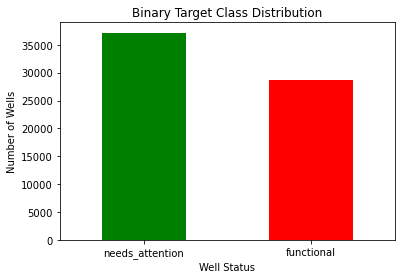

In [20]:
# Count how many rows in each class
class_counts = df['status_binary'].value_counts()
print("Number of wells per class:")
print(class_counts)

# Display the proportion (percentage) per class
class_proportions = df['status_binary'].value_counts(normalize=True) * 100
print("\nPercentage distribution per class:")
print(class_proportions.round(2))

# Plot the class distribution
class_counts.plot(kind='bar', color=['green', 'red'], title='Binary Target Class Distribution')
plt.xlabel('Well Status')
plt.ylabel('Number of Wells')
plt.xticks(rotation=0)
plt.show()

##### The dataset is fairly balanced with respect to the binary target classes:This shows that:
##### About 56.44% of wells are functional
##### About 43.56% need attention
##### This near-even split ensures that our model will have sufficient examples from both classes to learn meaningful patterns, reducing the risk of bias towards the majority class.

### b) **Univariate Analysis (Categorical Features)**
#### Exploring key categorical variables to understand their distributions.

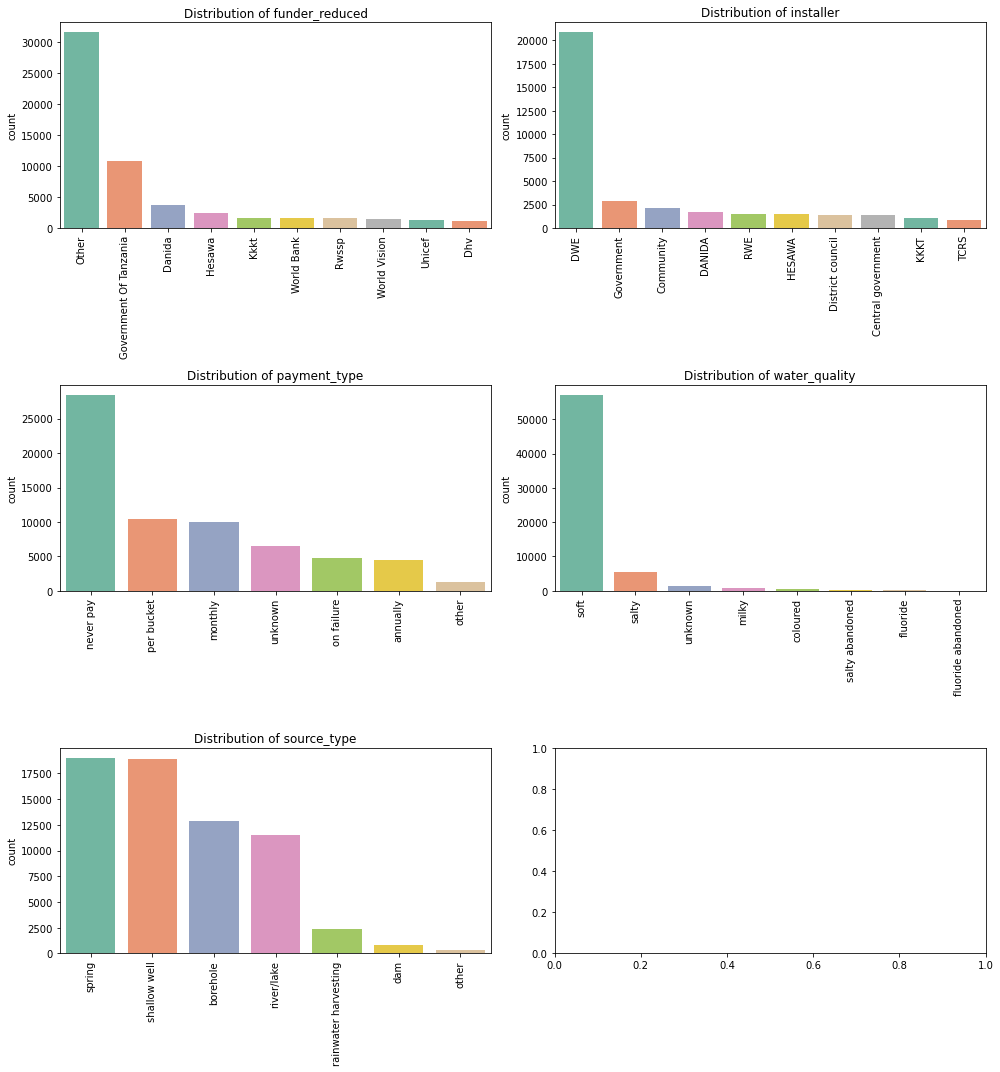

In [21]:
# visualizing Catogorical variables
# Drop ID column
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Categorical columns to visualize
categorical_cols = ['funder_reduced', 'installer', 'payment_type', 'water_quality', 'source_type']

# Setup the subplot grid
num_plots = len(categorical_cols)
cols = 2  
rows = (num_plots + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

for i, col in enumerate(categorical_cols):
    top10 = df[col].value_counts().iloc[:10].index
    sns.countplot(data=df, x=col, order=top10, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

##### From the visualization of the categorical columns,it is clear that:
##### - **Funder:** Government of Tanzania funds the majority of wells.
##### - **Installer:** DWE is the most frequent installer — their wells' performance may be significant.
##### - **Payment Type:** Most wells are community-funded (free), suggesting non-commercial purpose.
##### - **Water Quality:** Majority use soft water relevant for assessing water safety.
##### - **Source Type:** Shallow wells, springs, and boreholes dominate, potentially influencing functionality.


### c) Distribution of Numerical values
#### Checking outliers -this is to check data points which are significantly different from most values in our dataset.

In [22]:
#checking outliers in numerical data using Interquartile range
#select numerical columns only
numerical_data=df.select_dtypes(include='number')


for col in numerical_data.columns:
    Q1 = numerical_data[col].quantile(0.25)
    Q3 = numerical_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Extract outlier rows
    outliers = df[(numerical_data[col] < lower_bound) | (numerical_data[col] > upper_bound)]

    print(f"Column: {col}")
    if not outliers.empty:
        print(outliers[[col]])
    else:
        print("No outliers found.")
    print("-" * 50)

Column: amount_tsh
       amount_tsh
0          6000.0
11          200.0
16          500.0
19          500.0
20          200.0
...           ...
14833      1000.0
14837       500.0
14838      3000.0
14842       600.0
14846      1000.0

[13487 rows x 1 columns]
--------------------------------------------------
Column: gps_height
No outliers found.
--------------------------------------------------
Column: longitude
       longitude
53           0.0
168          0.0
253          0.0
256          0.0
285          0.0
...          ...
14634        0.0
14649        0.0
14676        0.0
14766        0.0
14831        0.0

[1812 rows x 1 columns]
--------------------------------------------------
Column: latitude
No outliers found.
--------------------------------------------------
Column: num_private
       num_private
469             39
476              5
519             45
527              6
608              3
...            ...
14514            1
14538           39
14554           34
1464

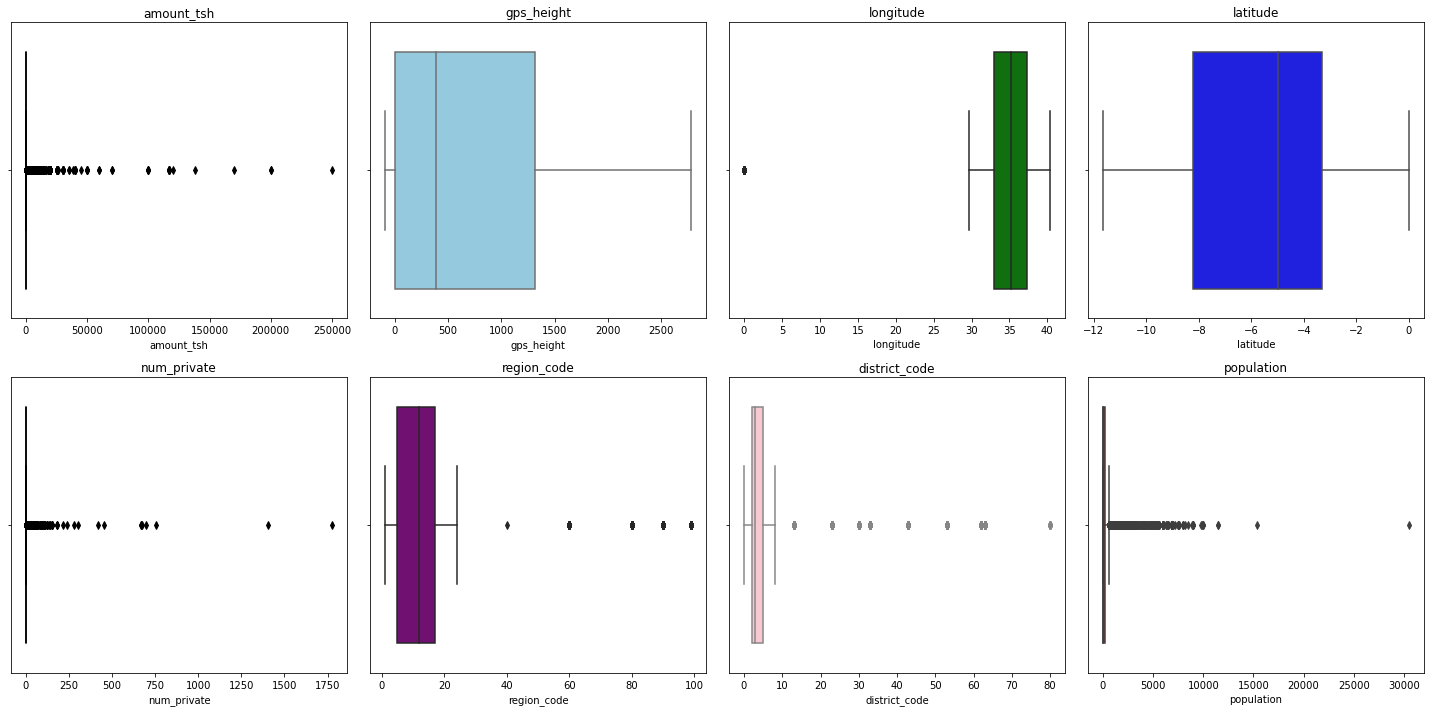

In [23]:
#Visualizating the outliers in our numerical data
def plt_boxplots(data,cols):
    fig, axes =plt.subplots(2,4, figsize=(20,10))
    axes=axes.ravel()
    

    colors=['black','skyblue','green','blue','black','purple','pink','brown','gray']

    for i,col in enumerate(cols[:8]):
        # convert the x-axis variable to a numeric data type
        
        data[col] = data[col].astype(float)
        sns.boxplot(x=data[col], ax=axes[i], color=colors[i])
        
        axes[i].set_title(col)
    plt.tight_layout()
cols = df.select_dtypes(include='number').columns

plt_boxplots(df, cols)



##### **Amount_tsh**-Highly skewed with many extreme outliers on the right.Most of the data concentrated near zero.outliers to be handled or use log transformation.
##### **gps height**-More symmetric distribution, but still shows some right-side outliers.
##### **construction year**-Relatively well-distributed with no strong outliers.Appears normally distributed with a peak near a central value.
##### **Population**-Very right-skewed — many outliers in high population areas.Most wells serve a small population, with a few outliers serving large communities.
##### **num_plate**-Highly skewed and sparse — almost all values are 0 or low.Presence of extreme outliers might be a low-importance feature.
##### **Region code** and **district code**-Both appear more categorical than numeric.to be ploted as barplot.



#### d)Irrelevant columns
##### The following columns appear not to have relevant infomation towards our project,we will therefore  drop them:(**Permit,Subvillage,wpt_name,region_code,district_code,iga, ward,recorded_by and date_recorded**)


In [24]:
irrelevant_columns = ['permit', 'subvillage', 'wpt_name', 'region_code', 'district_code',
                      'lga', 'ward', 'recorded_by', 'date_recorded','num_private']

# Keep only those columns that are actually still in the DataFrame
columns_to_drop = [col for col in irrelevant_columns if col in df.columns]

# Drop the invalid columns
df.drop(columns=columns_to_drop, inplace=True)

print(f"Dropped columns: {columns_to_drop}")
print(f"Current shape: {df.shape}")

Dropped columns: ['permit', 'subvillage', 'wpt_name', 'region_code', 'district_code', 'lga', 'ward', 'recorded_by', 'date_recorded', 'num_private']
Current shape: (65839, 29)


### e) Relationship between Target variable and features

 ##### Categorical vs Target variable-checking our catgorical values relate with our target value forthe puepose of modeling.

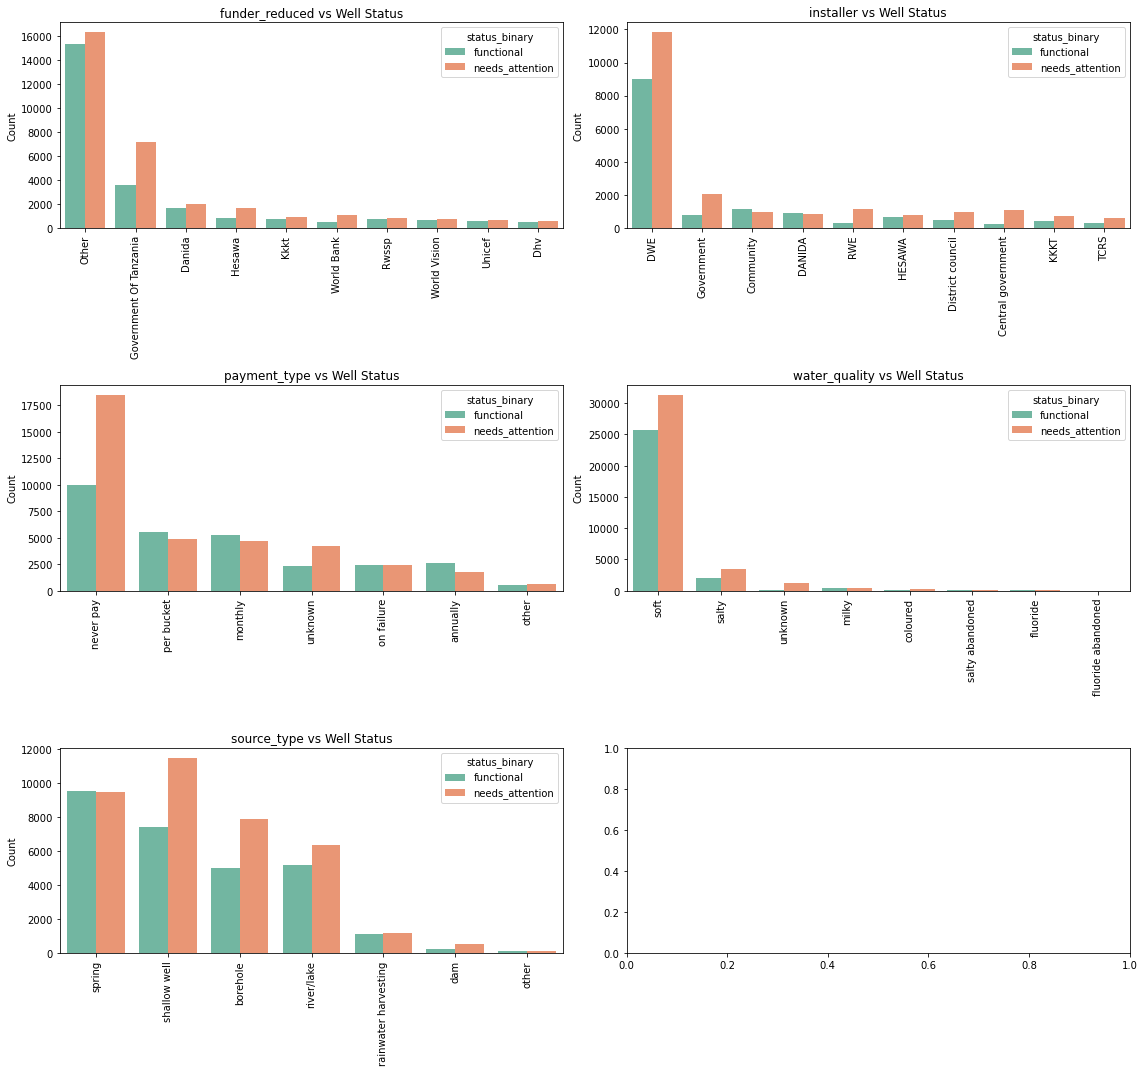

In [25]:

#Layout
n_cols =2
n_rows=(len(categorical_cols)+n_cols-1) // n_cols

# create figure
fig,axes=plt.subplots(n_rows, n_cols,figsize=(16,5 * n_rows))
axes=axes.flatten()

for i,col in enumerate(categorical_cols):
    top10 = df[col].value_counts().iloc[:10].index
    sns.countplot(data=df, x=col, hue='status_binary', order=top10, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} vs Well Status')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

##### From the visualization ,relationship between categorical vs target is as follows:
##### **Funder vs status** -Government of Tanzania funds the largest number of wells, but a higher portion of these wells need attention than are functional. Danida, Rwssp, and World Vision show a more balanced distribution, with relatively more functional wellsHesawa, Kkkt, and World Bank have a higher number of wells needing attention.
##### **Installer vs status**-DWE is by far the most common installer, with a large number of wells both functional and needing attention.
##### **Payment vs status**-"Never pay" is the most common and has high failure."Per bucket" and "monthly" payments align more with functional wells, possibly reflecting better maintenance via community investment.
##### **water Quality vs Status**-Wells with soft water are more likely to be functional.wells with salty or milky water show higher need for attention.
##### **Source type vs status** -Spring and river/lake sources show better functionality.Shallow wells and boreholes are more prone to needing attention.



### Numerical vs Target variable

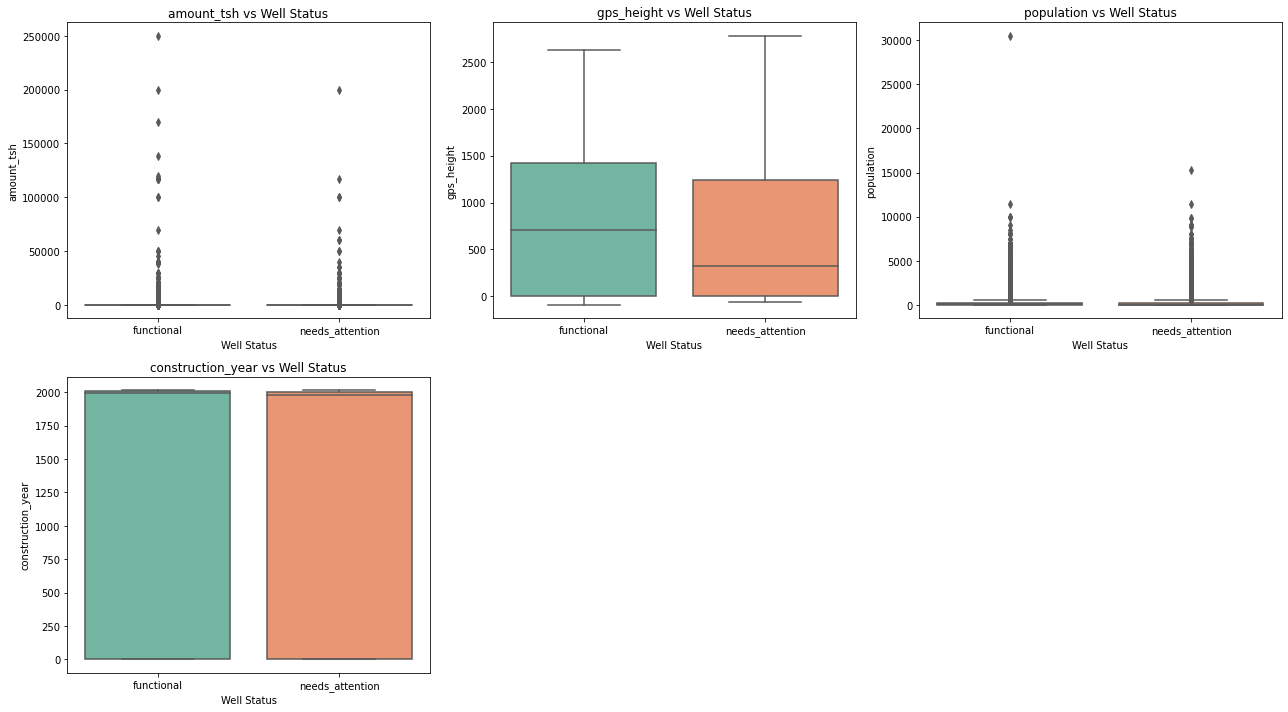

In [26]:
# Select only key numeric features for comparison
selected_numeric_cols = ['amount_tsh', 'gps_height', 'population', 'construction_year']
# layout
num_features = len(selected_numeric_cols)
cols_per_row = 3
rows = (num_features + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(selected_numeric_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(data=df, x='status_binary', y=col, palette='Set2')
    plt.title(f'{col} vs Well Status')
    plt.xlabel('Well Status')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


#### **

#### **Preprocessing**


#### a)Log transformation for skewed numerical features
##### amount_tsh and population are highly skewed.applying log transformation will compress the scale for a better model.

In [27]:
# Log transform skewed features
df['amount_tsh_log'] = np.log1p(df['amount_tsh'])
df['population_log'] = np.log1p(df['population'])


In [28]:
#Drop original amount_tsh and population
df.drop(['amount_tsh', 'population'], axis=1, inplace=True)


### b)Construction year to Well Age
##### The well_age feature represents the age of a water well calculated as the difference between the current year (2025) and the year the well was constructed. This helps us understand how the age of a well affects its functionality, as older wells might be more prone to failures.
##### Since some wells have invalid construction years (e.g. 0), we replace these with missing values and then impute using the median well age to maintain data integrity.

In [29]:
# Calculate well age
df['well_age'] = 2025 - df['construction_year']

# Handle invalid years (e.g., 0)
df.loc[df['well_age'] == 2025, 'well_age'] = np.nan  # Replace invalid '0' year wells with NaN

# Impute missing well_age with median value
df['well_age'] = df['well_age'].fillna(df['well_age'].median())

### c)Encode Categorical Variables
##### Machine learning model will require numerical inputs.We will use one-hot encoding to convert categorical features into binary.To avoid dummy variable trap, we will drop the first category from each one-hot encoded feature using drop_first=True

In [30]:
#identify our cleaned categorical columns exclude the target.
categ_cols=cat_cols = df.select_dtypes(include='object').columns.tolist()
categ_cols = [col for col in categ_cols if col not in ['status_group', 'status_binary']]
print("Initial categorical columns:")
print(categ_cols)


Initial categorical columns:
['installer', 'basin', 'region', 'public_meeting', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'funder_reduced']


In [31]:
# Encode selected categorical variables using One-Hot Encoding
df_encoded = pd.get_dummies(df,categ_cols, columns=categ_cols, drop_first=True)
print(f"Shape after encoding: {df_encoded.shape}")

Shape after encoding: (65839, 2284)


#### d)Split dataset back to Train and Test

In [32]:
# Separate train and test based on the 'source' column
train_cleaned = df_encoded[df_encoded['source_train'] == 1].copy()
test_cleaned = df_encoded[df_encoded['source_train'] == 0].copy()

# Drop the source columns
train_cleaned.drop(columns=['source_train'], inplace=True)
test_cleaned.drop(columns=['source_train', 'status_group', 'status_binary'], errors='ignore')

,gps_height,longitude,latitude,construction_year,amount_tsh_log,population_log,well_age,installer_0,installer_A.D.B,installer_AAR,...,funder_reduced_Norad,funder_reduced_Other,funder_reduced_Private Individual,funder_reduced_Rwssp,funder_reduced_Tasaf,funder_reduced_Tcrs,funder_reduced_Unicef,funder_reduced_Water,funder_reduced_World Bank,funder_reduced_World Vision
0,1996.0,35.290799,-4.059696,2012,0.000000,5.774552,13.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1569.0,36.656709,-3.309214,2000,0.000000,5.707110,25.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1685.0,36.685279,-3.302420,1990,0.000000,5.303305,35.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,550.0,36.398041,-7.541382,2007,0.000000,6.398595,18.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,234.0,39.607420,-10.893786,1982,0.000000,0.693147,43.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14844,0.0,34.096878,-3.079689,0,0.000000,0.000000,25.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14845,34.0,38.852669,-6.582841,1988,0.000000,3.044522,37.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14846,0.0,37.451633,-5.350428,1994,6.908755,7.993282,31.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14848,998.0,35.432732,-10.584159,2009,0.000000,5.017280,16.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [33]:
train_cleaned.columns

Index(['gps_height', 'longitude', 'latitude', 'construction_year',
       'status_group', 'status_binary', 'amount_tsh_log', 'population_log',
       'well_age', 'installer_0',
       ...
       'funder_reduced_Norad', 'funder_reduced_Other',
       'funder_reduced_Private Individual', 'funder_reduced_Rwssp',
       'funder_reduced_Tasaf', 'funder_reduced_Tcrs', 'funder_reduced_Unicef',
       'funder_reduced_Water', 'funder_reduced_World Bank',
       'funder_reduced_World Vision'],
      dtype='object', length=2283)

#### e) Create features and target
##### X to be our features and y to be our target to get what features to train to our model.

In [34]:
# Features and target
X = train_cleaned.drop(columns=['status_group', 'status_binary'], errors='ignore')
y = train_cleaned['status_binary']
#use test size of 0.2 and random state 42

X_train, X_val, y_train, y_val = train_test_split( X, y, stratify=y, test_size=0.2, random_state=42)

### f) Standardization
##### In our dataset, several numerical feature exist on **different scales** we will standardize them using standardscaler:

- `amount_tsh_log` might range between 0 and 15
- `gps_height` can span from -50 to over 2000
- `well_age` ranges from 0 to over 60 years
- `population_log` values vary depending on the community size

In [35]:
# Instantiate the scaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### **Modeling and Evaluation**
##### I will be comparing three models here:
1. **Logistic regression model**. 
2. **Decision tree model**.
3. **Random forest classifier**.

##### These models' performance will then be evaluated by use of classification metrics such as roc-auc score, precision, recall and F1 score.

### a) **Logistic Model**

In [36]:
#  Instantiate the model
log_model = LogisticRegression(max_iter=300,solver='saga', random_state=42)
#  Fit the model
log_model.fit(X_train_scaled, y_train)
#  Make predictions
y_pred = log_model.predict(X_val_scaled)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


c:\Users\PC\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### **Model Evaluation**

In [37]:
# Evaluate performance
print("=== Confusion Matrix ===")
#print(confusion_matrix(y_val, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_val, y_pred))

print("\n=== Accuracy Score ===")
print("Accuracy:", round(accuracy_score(y_val, y_pred) * 100, 2), "%")

=== Confusion Matrix ===

=== Classification Report ===
                 precision    recall  f1-score   support

     functional       0.76      0.85      0.81      5737
needs_attention       0.80      0.68      0.73      4788

       accuracy                           0.77     10525
      macro avg       0.78      0.77      0.77     10525
   weighted avg       0.78      0.77      0.77     10525


=== Accuracy Score ===
Accuracy: 77.49 %


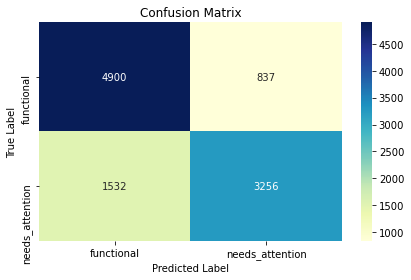

In [38]:
#Visualize our results
# Get predictions and confusion matrix
y_pred = log_model.predict(X_val_scaled)
cm = confusion_matrix(y_val, y_pred, labels=["functional", "needs_attention"])

# Plot using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=["functional", "needs_attention"], 
            yticklabels=["functional", "needs_attention"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

##### True Positives (TP): 4900 Wells that are functional and were correctly predicted as functional.

#### False Negatives (FN): 837 Wells that are functional, but were predicted as needing attention.These are missed good wells ,could lead to unnecessary maintenance.

#### False Positives (FP): 1532 Wells that need attention, but were predicted as functional.This is a serious concern because these wells may fail and get overlooked.

#### True Negatives (TN): 3256 Wells that need attention, and were correctly predicted.

### Visualize metrics-Accurancy,recall,precision and F1Score

In [39]:
# Get classification report as dict
report = classification_report(y_val, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Check the columns available
print(report_df.columns)

Index(['precision', 'recall', 'f1-score', 'support'], dtype='object')


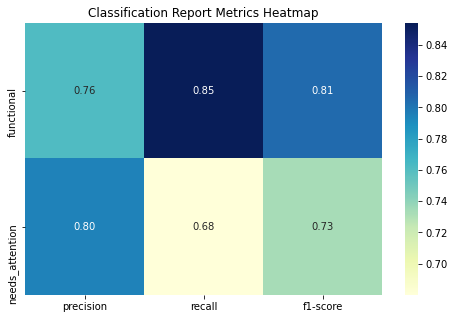

In [40]:
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.loc[['functional', 'needs_attention'], ['precision', 'recall', 'f1-score']], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Classification Report Metrics Heatmap')
plt.show()

### **Interpretation**
#### Precision = 0.80 (80% of predicted wells needing attention were correct)
##### Recall = 0.68 (68% of actual wells needing attention were found)
##### F1-score = 0.73 (balance of the two)

### b)**Decision trees Model**

In [41]:
# Initialize model with some parameters to control overfitting
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=10)

# Train model
dt_model.fit(X_train_scaled, y_train)

# Predict on validation set
y_pred_dt = dt_model.predict(X_val_scaled)


### **Evaluate the model**

In [42]:
# Evaluate results
print(classification_report(y_val, y_pred_dt))

                 precision    recall  f1-score   support

     functional       0.74      0.87      0.80      5737
needs_attention       0.81      0.64      0.71      4788

       accuracy                           0.77     10525
      macro avg       0.78      0.76      0.76     10525
   weighted avg       0.77      0.77      0.76     10525



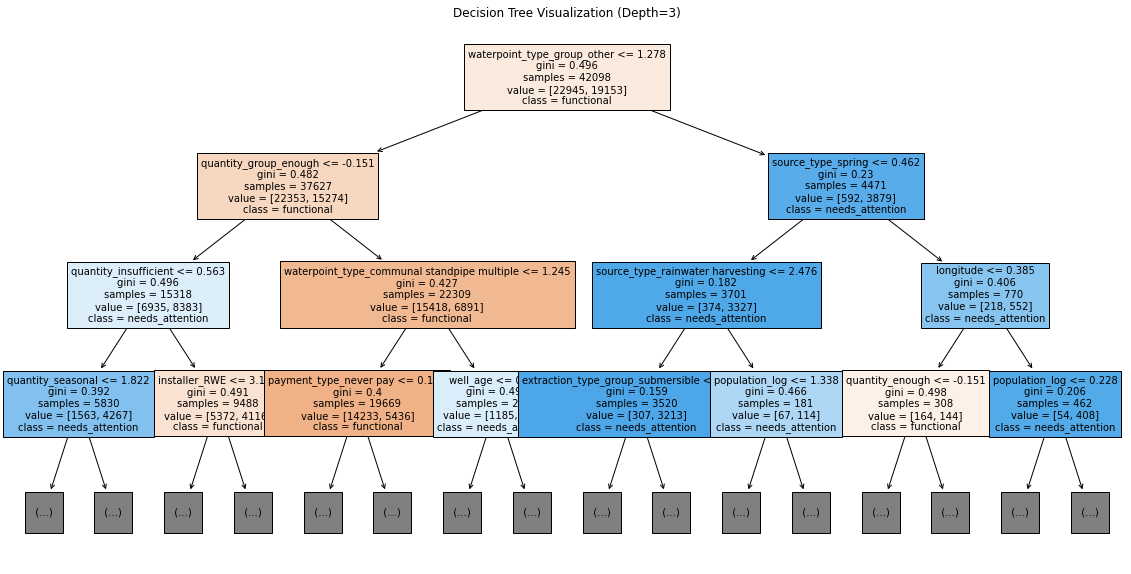

In [43]:
#visualize the decision tree
plt.figure(figsize=(20, 10))  # Adjust size as needed
plot_tree(
    dt_model,
    feature_names=X_train.columns,
    class_names=dt_model.classes_,
    filled=True,
    max_depth=3,  # Limit depth shown for readability
    fontsize=10
)
plt.title("Decision Tree Visualization (Depth=3)")
plt.show()

### **Interpretation**
##### as per the decision tree model: 
##### **Functional**
##### Recall = 0.87:The model correctly identifies 87% of truly functional wells.
##### Precision = 0.74: Out of all predicted functional wells, 74% were actually functional.

##### **Needs Attention**
##### Recall = 0.64: The model is missing 36% of the "needs_attention" wells (false negatives).
##### Precision = 0.81: When it predicts "needs_attention", it's right 81% of the time — pretty good.

##### **Overall Accuracy: 77%**
##### That’s strong and comparable to many real-world models, especially for imbalanced classes.

### d) **RandomForest classifier model**


In [44]:
# 1. Initialize model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
# 2. Train model
rf_model.fit(X_train_scaled, y_train)

# 3. Predict
y_pred_rf = rf_model.predict(X_val_scaled)



### **Model Evaluation***

In [45]:
# 4. Evaluate
print("=== Confusion Matrix ===")
print(confusion_matrix(y_val, y_pred_rf))

print("\n=== Classification Report ===")
print(classification_report(y_val, y_pred_rf))
print("\n=== Accuracy Score ===")
print(f"Accuracy: {accuracy_score(y_val, y_pred_rf) * 100:.2f} %")

=== Confusion Matrix ===
[[4943  794]
 [1114 3674]]

=== Classification Report ===
                 precision    recall  f1-score   support

     functional       0.82      0.86      0.84      5737
needs_attention       0.82      0.77      0.79      4788

       accuracy                           0.82     10525
      macro avg       0.82      0.81      0.82     10525
   weighted avg       0.82      0.82      0.82     10525


=== Accuracy Score ===
Accuracy: 81.87 %


### **Interpretation**

##### The Random Forest classifier achieved an overall accuracy of 81.87% on the validation set. For the functional class, the model reached a precision of 0.82, a recall of 0.86, and an F1-score of 0.84, based on 5,737 samples. For the needs attention class, it obtained a precision of 0.82, a recall of 0.77, and an F1-score of 0.79, evaluated on 4,788 samples.

### e) **Comparison of the three Models**


##### Logistic Regression, as the first base model, achieved an overall accuracy of 77.49%. It performed well on the functional class with a recall of 85%, but struggled with the needs attention class, achieving only 68% recall. This indicates that while it is effective at identifying working waterpoints, it tends to miss a significant number of those needing attention.

##### Decision Tree, the second base model, has a slightly lower accuracy of 77.0%. It achieved a high recall of 87% for functional waterpoints but only 64% recall for needs attention. This suggests it overemphasized the majority class, making it prone to overfitting and less reliable for detecting waterpoints in need of repair.

##### Random Forest, the third base model, outperformed both previous models with an accuracy of 81.87%. It maintained a strong balance between precision and recall across both classes achieving 86% recall for functional and 77% recall for needs attention. This makes it the most robust and reliable model among the three for classifying waterpoint functionality


### **AUC for Logistic and Random Forest classifier**


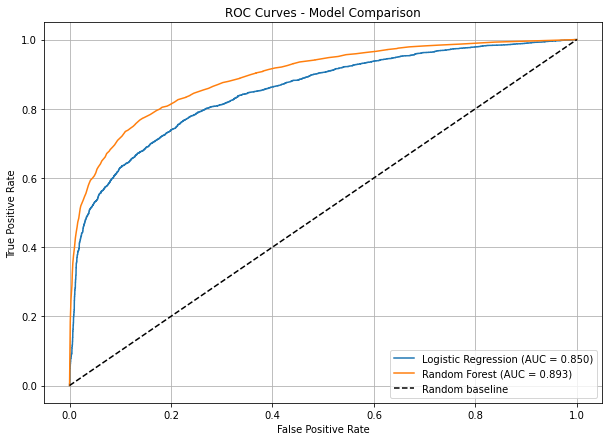

In [46]:
# Predict probabilities
lr_probs = log_model.predict_proba(X_val_scaled)[:, 1]
rf_probs = rf_model.predict_proba(X_val_scaled)[:, 1]


# Compute ROC curves and AUCs
fpr_lr, tpr_lr, _ = roc_curve(y_val, lr_probs, pos_label='needs_attention')
fpr_rf, tpr_rf, _ = roc_curve(y_val, rf_probs, pos_label='needs_attention')

auc_lr = roc_auc_score(y_val, lr_probs)
auc_rf = roc_auc_score(y_val, rf_probs)

# Plot
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### **Logistic Regression**- higher AUC (0.850): Better overall ranking ability.Higher precision for “needs_attention”: fewer false positives.Lower recall for “needs_attention”: more false negatives (i.e., more failing wells are missed).

#### **Random Forest** -Higher accuracy and F1-score overall.Better recall: detects more failing wells (important for safety-critical tasks).Slightly lower AUC, but still strong performance.

### f)**Hyperparameter Tuning**
##### From the comparison of the three base models , Random forest stood out therefore we will tune it further by balancing the class weights between functional and needs attention.

In [47]:

# Initialize Random Forest with balanced class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred = rf_model.predict(X_val_scaled)



### **Evaluation**

In [48]:
# Evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

                 precision    recall  f1-score   support

     functional       0.82      0.86      0.84      5737
needs_attention       0.82      0.77      0.79      4788

       accuracy                           0.82     10525
      macro avg       0.82      0.81      0.82     10525
   weighted avg       0.82      0.82      0.82     10525



### **Interpretation**


##### Both classes attain equal precision (0.82), indicating reliability in positive predictions.
#### Recall for functional (0.86) is strong, meaning the majority of working wells are identified.
#### Recall for needs_attention (0.77) is slightly lower, meaning 23% of failing wells are missed.
#### The F1-scores (0.84 and 0.79) show a good balance between precision and recall.
#### Overall, the model achieves 82% accuracy, with macro and weighted averages supporting class balance

### **ROC AND AUC  ,Visualization  of RandomForest Classifier model**

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
# Get probability estimates for the positive class ("needs_attention")
y_probs = rf_model.predict_proba(X_val_scaled)[:, 1]

# Compute false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_val, y_probs, pos_label='needs_attention')

# Compute the AUC
roc_auc = roc_auc_score(y_val, y_probs)
print(f"Validation ROC AUC: {roc_auc:.3f}")

Validation ROC AUC: 0.894


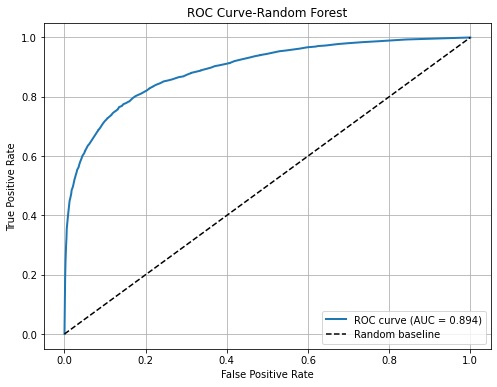

In [50]:
#Visualize
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})', lw=2)
plt.plot([0,1], [0,1], 'k--', label='Random baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve-Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### **Interpretation**

#### The ROC curve for our Random Forest model shows an **AUC of 0.894**, which indicates excellent model performance.

- **AUC** represents the probability that the model will rank a randomly chosen "needs_attention" well **higher** than a randomly chosen "functional" one.
- With an AUC of **0.894**, there's an **89.4% chance** the model correctly ranks a failing waterpoint above a working one.
- This performance is significantly better than random guessing (**50%**) and suggests that the classifier can confidently differentiate between the two classes.
- The model is highly effective in capturing the trade-off between sensitivity (recall) and specificity.


### **Feature Analysis**
##### Understanding which features influence our prediction on whether  a well is functional or needs attention we will perfom feature importance analysis.
##### The features with the highest importance scores are the most influential in determining "functional" or "needs attention".
##### By identifying these key drivers, we can better understand what factors lead to failing wells and target those areas for improvement. These insights can guide in better solutions when it comes to drilling wells in Tanzania.



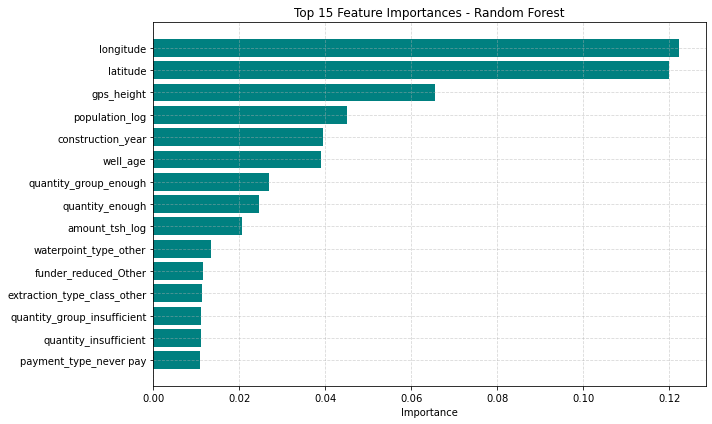

In [51]:

# Get feature importances from the trained random forest model
importances = rf_model.feature_importances_
features = X_train.columns  

# Create DataFrame and sort
rf_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'][:15][::-1], rf_importance_df['Importance'][:15][::-1], color='teal')
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#### Top Features:
1. **`population_log`** — The size of the population served by a waterpoint is the most critical predictor. Larger populations may indicate higher usage and stress on infrastructure.
2. **`amount_tsh_log`** — The log-transformed amount of water stored or flowing is a strong indicator of usage and functionality.
3. **`gps_height`** — Elevation could influence water pressure or availability.
4. **`age`** — Older waterpoints are more prone to deterioration and failures.
5. **`longitude`, `latitude`** — Geographic coordinates capture regional patterns and conditions.
 #### Less Influential Features:Although features like `payment_type`, `installer`, and `region_code` have lower individual importance, they may still help the model in specific cases or interact with other variables.


### **Recommendations**
#### 1. **Focus on High-Priority Wells**:Wells serving larger populations (population_log) and those with lower water availability (amount_tsh_log) should be prioritized for inspections and maintenance.Use the trained model to automatically flag waterpoints that are likely to need attention based on current metadata.
#### 2. Invest in Targeted InfrastructureThe model shows that older wells and those at certain elevations (gps_height) are more prone to failure. Infrastructure investments can be focused on:**Replacing aging systems**.and **Adjusting technology choice based on elevation (e.g., gravity-fed vs. pump-based)**
#### 3.Use the Random Forest model in a real-time dashboard to monitor new waterpoint data.

### **Conclusion**
#### This project achieved its core objectives by building, evaluating, and interpreting multiple machine learning models to classify waterpoints in Tanzania.

#### The Random Forest classifier was selected as the best model based on:
      1.High accuracy (≈82%)
      2.Balanced precision and recall
      3.Strong feature interpretability
      

Feature importance analysis provided actionable insights into the causes of waterpoint failures, particularly around population, water availability, and infrastructure age.

#### By deploying this model, stakeholders can:
    1.Improve preventive maintenance planning
    2.Reduce downtime of essential water infrastructure
    3.Optimize the allocation of limited maintenance resources

Ultimately, this solution contributes to improved water service delivery and supports long-term sustainability of rural water systems.